In [1]:
import scanpy as sc 

In [2]:
adata = sc.read_h5ad('../data/RREAE_5k_raw_integration_processed.h5ad')

/Users/christoffer/miniconda3/envs/sc/lib/python3.8/site-packages/anndata/_core/anndata.py:1838: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


In [3]:
adata

AnnData object with n_obs × n_vars = 891821 × 5101
    obs: 'x_centroid', 'y_centroid', 'transcript_counts', 'control_probe_counts', 'genomic_control_counts', 'control_codeword_counts', 'unassigned_codeword_counts', 'deprecated_codeword_counts', 'total_counts', 'cell_area', 'nucleus_area', 'nucleus_count', 'segmentation_method', 'run', 'grid_label', 'project', 'strain', 'n_genes_by_counts', 'n_counts', 'n_genes', 'leiden_0.5', 'leiden_1', 'leiden_1.5', 'leiden_2', 'leiden_2.5', 'sample_id', 'sub_type', 'cell_type', 'cell_class', 'area', 'sample_name', 'region', 'course', 'condition', 'model', 'cell_id', 'rbd_domain', 'sub_type_I', 'sub_type_II', 'sub_type_III', 'cell_id_2', 'match_key', 'lesion_density_call', 'lesion_distance_um', 'lesion_distance_bin', 'celltype_merged', 'dist_bin'
    var: 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'mean', 'std'
    uns: 'cell_class_colors', 'cell_polygons', 'cell_type_colors', 'condition_colors', 'course_colors', 'd

In [4]:
metabolic_modules = {
    "Warburg": ["Hif1a","Myc","Pik3cd","Akt1","Mtor","Pdk4","Slc2a1","Slc2a3","Hk2","Pfkp","Aldoa","Pgk1","Eno1","Pkm","Ldha","Ldhb","Slc16a3","Slc16a1"],
    "Mito_ETC": ["Ndufs1","Sdha","Sdhb"],
    "Mito_Dynamics": ["Mfn1","Mfn2","Opa1","Dnm1l","Miga1","Miga2"],
    "Pyruvate_Entry": ["Pdk1","Mpc1","Mpc2"],
    "OxStress": ["Txnip","Hmox1","Nqo1"],
}

In [5]:
import scanpy as sc

for name, genes in metabolic_modules.items():
    sc.tl.score_genes(adata, gene_list=genes, score_name=f"{name}_score", use_raw=False)

In [7]:
sc.tl.rank_genes_groups(adata, groupby="course", use_raw=False, method="wilcoxon")
# Filter results to genes in your metabolic lists

In [8]:
import pandas as pd
import numpy as np

# Collect all your metabolic gene sets
metabolic_genes = set(sum(metabolic_modules.values(), []))

# Extract DE results from Scanpy
de_res = sc.get.rank_genes_groups_df(adata, group=None)  # group=None returns all groups

# Filter to metabolic genes only
de_res_meta = de_res[de_res['names'].isin(metabolic_genes)]

# Optionally, sort by group & logfoldchange
de_res_meta = de_res_meta.sort_values(["group", "logfoldchanges"], ascending=[True, False])

# Save results
de_res_meta.to_csv("DE_metabolic_genes.csv", index=False)

In [13]:
de_res_meta.sort_values(by = 'logfoldchanges', ascending = False).head(50)

,group,names,scores,logfoldchanges,pvals,pvals_adj
15361,chronic peak,Hmox1,64.532860,1.191048,0.000000e+00,0.000000e+00
15316,chronic peak,Ldha,91.747993,1.152642,0.000000e+00,0.000000e+00
35810,onset I,Pdk4,14.491349,1.130798,1.374162e-47,1.030824e-46
46018,peak I,Slc16a3,55.546562,1.061830,0.000000e+00,0.000000e+00
56174,peak III,Hmox1,80.918434,1.050656,0.000000e+00,0.000000e+00
45990,peak I,Hk2,64.605316,0.945423,0.000000e+00,0.000000e+00
56191,peak III,Pik3cd,74.867455,0.927933,0.000000e+00,0.000000e+00
15441,chronic peak,Slc16a3,43.842785,0.879713,0.000000e+00,0.000000e+00
46003,peak I,Hmox1,58.992973,0.856764,0.000000e+00,0.000000e+00
46005,peak I,Pik3cd,58.872391,0.813005,0.000000e+00,0.000000e+00


/Users/christoffer/miniconda3/envs/sc/lib/python3.8/site-packages/scanpy/plotting/_dotplot.py:747: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


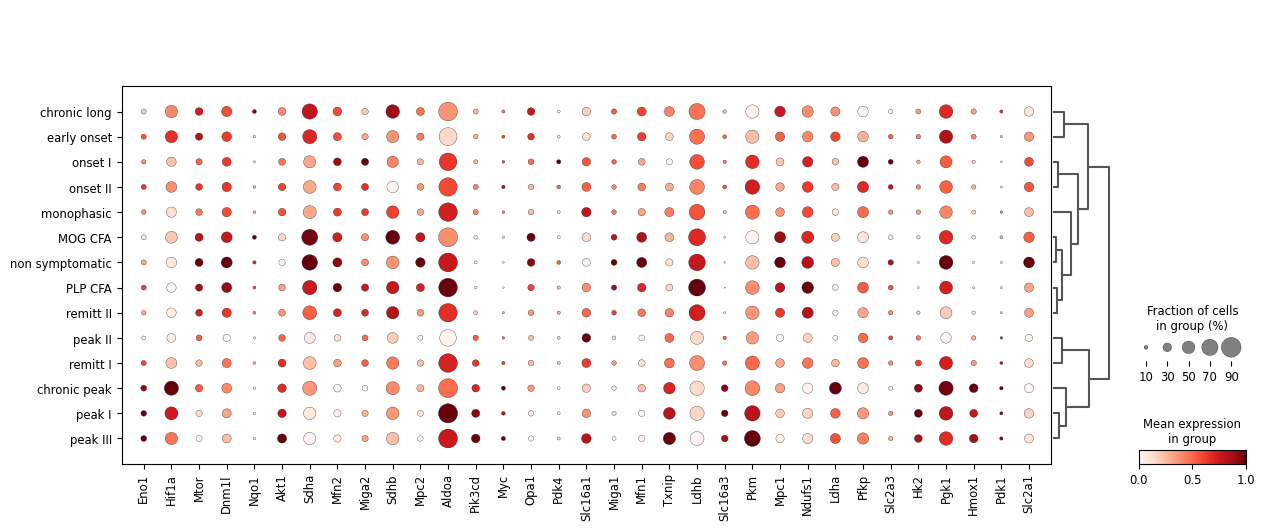

In [9]:
sc.pl.rank_genes_groups_dotplot(
    adata,
    groups=adata.obs["course"].unique().tolist(),
    var_names=list(metabolic_genes),
    standard_scale='var'
)

In [19]:
adata[adata.obs.model == 'RR'].obs.course.unique()

['remitt I', 'onset I', 'peak I', 'peak II', 'monophasic', 'PLP CFA', 'onset II', 'peak III', 'remitt II']
Categories (9, object): ['PLP CFA', 'monophasic', 'onset I', 'onset II', ..., 'peak II', 'peak III', 'remitt I', 'remitt II']

In [21]:
adata[adata.obs.model == 'Chronic'].obs.course.unique()

['remitt II', 'non symptomatic', 'early onset', 'chronic peak', 'MOG CFA', 'chronic long']
Categories (6, object): ['MOG CFA', 'chronic long', 'chronic peak', 'early onset', 'non symptomatic', 'remitt II']

In [25]:
import scanpy as sc
import numpy as np
import pandas as pd

MODEL_COL    = "model"
COURSE_COL   = "course"
CELLTYPE_COL = "celltype_merged"

# Per-model baselines
BASELINE_BY_MODEL = {
    "RR": "PLP CFA",
    "Chronic": "MOG CFA",
}

# 1) Score metabolic modules per cell (adjust your dict as needed)
metabolic_modules = {
    "Warburg": ["Hif1a","Myc","Pik3cd","Akt1","Mtor","Pdk4","Slc2a1","Slc2a3","Hk2","Pfkp","Aldoa","Pgk1","Eno1","Pkm","Ldha","Ldhb","Slc16a3","Slc16a1"],
    "Mito_ETC": ["Ndufs1","Sdha","Sdhb"],
    "Mito_Dyn": ["Mfn1","Mfn2","Opa1","Dnm1l","Miga1","Miga2"],
    "Pyruvate": ["Pdk1","Mpc1","Mpc2"],
    "OxStress": ["Txnip","Hmox1","Nqo1"],
}

for name, genes in metabolic_modules.items():
    present = [g for g in genes if g in adata.var_names]
    if not present:
        print(f"[warn] {name}: 0/{len(genes)} genes present")
        continue
    sc.tl.score_genes(adata, present, score_name=f"{name}_score", use_raw=False)

# 2) Per-model, per-celltype z-scores vs that model’s control
def add_model_baseline_zscores(
    adata, modules, baselines,
    model_col="model", course_col="course", celltype_col="celltype_merged"
):
    for mdl, base in baselines.items():
        msk_model = adata.obs[model_col] == mdl
        if not msk_model.any():
            print(f"[warn] no cells for model {mdl}"); continue

        msk_ctrl = msk_model & (adata.obs[course_col] == base)
        if not msk_ctrl.any():
            print(f"[warn] baseline {base} not found in model {mdl}"); continue

        # control-only stats within this model
        score_cols = [f"{m}_score" for m in modules if f"{m}_score" in adata.obs]
        if not score_cols:
            print(f"[warn] no module scores in obs"); continue

        ctrl_df = adata.obs.loc[msk_ctrl, [celltype_col] + score_cols].copy()
        if ctrl_df.empty:
            print(f"[warn] no control rows for {mdl}"); continue

        # mean/std per cell type for each module in controls
        stats = (ctrl_df
                 .groupby(celltype_col)[score_cols]
                 .agg(['mean','std']))  # MultiIndex columns

        # Work on index subset (avoid categorical math)
        idx = adata.obs.index[msk_model]
        ct_series = adata.obs.loc[idx, celltype_col]

        for m in modules:
            col = f"{m}_score"
            if col not in adata.obs: 
                continue

            # Reindex means/stds to current cells' cell types, coerce to num arrays
            mu = stats[(col, 'mean')].reindex(ct_series).to_numpy(dtype='float64')
            sd = stats[(col, 'std')].reindex(ct_series).to_numpy(dtype='float64')

            # Replace NaNs and zeros in sd to avoid divide-by-zero
            sd = np.where(np.isnan(sd) | (sd == 0), 1.0, sd)

            x = adata.obs.loc[idx, col].to_numpy(dtype='float64')

            z = (x - mu) / sd
            zcol = f"{m}_z_vs_ctrl({mdl})"
            adata.obs.loc[idx, zcol] = z

add_model_baseline_zscores(adata, metabolic_modules.keys(), BASELINE_BY_MODEL)

# 3) Group means and log2FC vs model-specific control (celltype × course within each model)
def mean_and_log2fc_by_model(adata, modules, model_col=MODEL_COL, course_col=COURSE_COL, celltype_col=CELLTYPE_COL, baselines=BASELINE_BY_MODEL):
    score_cols = [f"{m}_score" for m in modules if f"{m}_score" in adata.obs]
    grp = (adata.obs.groupby([model_col, celltype_col, course_col])[score_cols]
           .mean()
           .reset_index())
    log2fc = {}  # {module: {model: df(celltypes x courses)}}
    for m in modules:
        col = f"{m}_score"
        if col not in grp.columns: 
            continue
        log2fc[m] = {}
        for mdl, base in baselines.items():
            sub = grp[grp[model_col]==mdl].copy()
            if sub.empty: 
                continue
            # pivot to celltype x course
            mat = sub.pivot(index=celltype_col, columns=course_col, values=col)
            if base not in mat.columns:
                print(f"[warn] baseline {base} not in courses for model {mdl}")
                continue
            log2fc[m][mdl] = np.log2((mat + 1e-9).div(mat[base] + 1e-9, axis=0))
    return grp, log2fc

group_means, log2fc_tables = mean_and_log2fc_by_model(adata, metabolic_modules.keys())

# Example: inspect Warburg log2FC for each model
warburg_rr      = log2fc_tables["Warburg"].get("RR")       # rows: celltypes, cols: courses
warburg_chronic = log2fc_tables["Warburg"].get("Chronic")

# 4) DEG with Control as reference per model (recommended: run per cell type)
def deg_per_model_celltype(
    adata, model, celltype, baseline_by_model=BASELINE_BY_MODEL,
    model_col=MODEL_COL, course_col=COURSE_COL, celltype_col=CELLTYPE_COL,
    method="wilcoxon"
):
    base = baseline_by_model[model]
    sub = adata[(adata.obs[model_col]==model) & (adata.obs[celltype_col]==celltype)].copy()
    if sub.n_obs < 20:
        print(f"[warn] small n for {model}/{celltype}: {sub.n_obs}")
    sc.tl.rank_genes_groups(sub, groupby=course_col, reference=base, method=method, use_raw=False)
    return sc.get.rank_genes_groups_df(sub, group=None)

# Example: astrocytes in each model, filtered to metabolic genes
metabolic_gene_set = set(g for genes in metabolic_modules.values() for g in genes)

deg_rr_astro = deg_per_model_celltype(adata, "RR", "Astrocyte")
deg_rr_astro_meta = deg_rr_astro[deg_rr_astro["names"].isin(metabolic_gene_set)].sort_values(["group","logfoldchanges"], ascending=[True, False])

deg_ch_astro = deg_per_model_celltype(adata, "Chronic", "Astrocyte")
deg_ch_astro_meta = deg_ch_astro[deg_ch_astro["names"].isin(metabolic_gene_set)].sort_values(["group","logfoldchanges"], ascending=[True, False])

/Users/christoffer/miniconda3/envs/sc/lib/python3.8/site-packages/pandas/core/internals/blocks.py:329: RuntimeWarning: invalid value encountered in log2
  result = func(self.values, **kwargs)
/Users/christoffer/miniconda3/envs/sc/lib/python3.8/site-packages/anndata/_core/anndata.py:1838: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


In [37]:
deg_ch_astro_meta.sort_values('logfoldchanges').tail(50)

,group,names,scores,logfoldchanges,pvals,pvals_adj
5423,chronic peak,Pkm,5.965717,0.146877,2.435617e-09,2.230535e-08
15464,non symptomatic,Mfn1,2.982237,0.151925,2.861504e-03,1.670083e-02
50,chronic long,Aldoa,9.772878,0.159853,1.472109e-22,8.074437e-21
151,chronic long,Pgk1,6.042480,0.160264,1.517632e-09,3.000559e-08
23397,remitt II,Hmox1,-1.052023,0.172063,2.927888e-01,6.593888e-01
15779,non symptomatic,Slc2a3,0.437983,0.178039,6.613988e-01,1.000000e+00
6612,chronic peak,Pdk1,0.670362,0.183579,5.026274e-01,8.945403e-01
5874,chronic peak,Pdk4,2.567495,0.193339,1.024363e-02,3.703244e-02
312,chronic long,Nqo1,3.764778,0.196898,1.666973e-04,1.560225e-03
20662,remitt II,Slc16a1,0.504268,0.210613,6.140733e-01,1.000000e+00


In [36]:
deg_rr_astro_meta.sort_values('logfoldchanges').tail(50)

,group,names,scores,logfoldchanges,pvals,pvals_adj
5311,onset I,Myc,2.710930,0.791315,6.709472e-03,2.203800e-02
5136,onset I,Slc16a1,11.158554,0.809205,6.504093e-29,1.793372e-27
15437,peak I,Ldha,20.307787,0.824952,1.097394e-91,2.856024e-90
26375,peak III,Pdk1,5.375033,0.839035,7.656857e-08,2.999818e-07
10532,onset II,Myc,4.186317,0.840802,2.835165e-05,2.003071e-04
26065,peak III,Myc,8.480990,0.941505,2.232848e-17,1.335259e-16
5275,onset I,Hk2,3.347253,0.958414,8.161675e-04,3.202516e-03
15,monophasic,Slc16a1,29.630035,0.997545,6.133309e-193,1.360261e-190
5405,onset I,Pik3cd,1.416345,1.003469,1.566746e-01,3.499112e-01
15350,peak I,Slc16a1,33.858818,1.018149,2.691961e-251,1.855634e-249


In [40]:
import scanpy as sc
import numpy as np
import pandas as pd
from scipy import sparse

MODEL_COL    = "model"
COURSE_COL   = "course"
CELLTYPE_COL = "celltype_merged"

# Per-model baselines
BASELINE_BY_MODEL = {
    "RR": "PLP CFA",
    "Chronic": "MOG CFA",
}

# 1) Score metabolic modules per cell
metabolic_modules = {
    "Warburg": ["Hif1a","Myc","Pik3cd","Akt1","Mtor","Pdk4","Slc2a1","Slc2a3","Hk2","Pfkp","Aldoa","Pgk1","Eno1","Pkm","Ldha","Ldhb","Slc16a3","Slc16a1"],
    "Mito_ETC": ["Ndufs1","Sdha","Sdhb"],
    "Mito_Dyn": ["Mfn1","Mfn2","Opa1","Dnm1l","Miga1","Miga2"],
    "Pyruvate": ["Pdk1","Mpc1","Mpc2"],
    "OxStress": ["Txnip","Hmox1","Nqo1"],
}
for name, genes in metabolic_modules.items():
    present = [g for g in genes if g in adata.var_names]
    if not present:
        print(f"[warn] {name}: 0/{len(genes)} genes present"); continue
    sc.tl.score_genes(adata, present, score_name=f"{name}_score", use_raw=False)

# 2) Per-model, per-celltype z-scores vs that model’s control
def add_model_baseline_zscores(
    adata, modules, baselines,
    model_col="model", course_col="course", celltype_col="celltype_merged"
):
    for mdl, base in baselines.items():
        msk_model = adata.obs[model_col] == mdl
        if not msk_model.any():
            print(f"[warn] no cells for model {mdl}"); continue
        msk_ctrl = msk_model & (adata.obs[course_col] == base)
        if not msk_ctrl.any():
            print(f"[warn] baseline {base} not found in model {mdl}"); continue

        score_cols = [f"{m}_score" for m in modules if f"{m}_score" in adata.obs]
        if not score_cols:
            print(f"[warn] no module scores in obs"); continue

        ctrl_df = adata.obs.loc[msk_ctrl, [celltype_col] + score_cols].copy()
        if ctrl_df.empty:
            print(f"[warn] no control rows for {mdl}"); continue

        stats = (ctrl_df.groupby(celltype_col)[score_cols].agg(['mean','std']))
        idx = adata.obs.index[msk_model]
        ct_series = adata.obs.loc[idx, celltype_col]

        for m in modules:
            col = f"{m}_score"
            if col not in adata.obs: 
                continue
            mu = stats[(col, 'mean')].reindex(ct_series).to_numpy(dtype='float64')
            sd = stats[(col, 'std')].reindex(ct_series).to_numpy(dtype='float64')
            sd = np.where(np.isnan(sd) | (sd == 0), 1.0, sd)
            x = adata.obs.loc[idx, col].to_numpy(dtype='float64')
            z = (x - mu) / sd
            zcol = f"{m}_z_vs_ctrl({mdl})"
            adata.obs.loc[idx, zcol] = z

add_model_baseline_zscores(adata, metabolic_modules.keys(), BASELINE_BY_MODEL)

# 3) Group means and log2FC vs model-specific control (module scores)
def mean_and_log2fc_by_model(adata, modules, model_col=MODEL_COL, course_col=COURSE_COL, celltype_col=CELLTYPE_COL, baselines=BASELINE_BY_MODEL):
    score_cols = [f"{m}_score" for m in modules if f"{m}_score" in adata.obs]
    grp = (adata.obs.groupby([model_col, celltype_col, course_col])[score_cols]
           .mean()
           .reset_index())
    log2fc = {}
    for m in modules:
        col = f"{m}_score"
        if col not in grp.columns: 
            continue
        log2fc[m] = {}
        for mdl, base in baselines.items():
            sub = grp[grp[model_col]==mdl].copy()
            if sub.empty: 
                continue
            mat = sub.pivot(index=celltype_col, columns=course_col, values=col)
            if base not in mat.columns:
                print(f"[warn] baseline {base} not in courses for model {mdl}")
                continue
            log2fc[m][mdl] = np.log2((mat + 1e-9).div(mat[base] + 1e-9, axis=0))
    return grp, log2fc

group_means, log2fc_tables = mean_and_log2fc_by_model(adata, metabolic_modules.keys())
warburg_rr      = log2fc_tables.get("Warburg", {}).get("RR")
warburg_chronic = log2fc_tables.get("Warburg", {}).get("Chronic")

# 4) DEG with Control as reference per model (run per cell type)
def deg_per_model_celltype(
    adata, model, celltype, baseline_by_model=BASELINE_BY_MODEL,
    model_col=MODEL_COL, course_col=COURSE_COL, celltype_col=CELLTYPE_COL,
    method="wilcoxon"
):
    base = baseline_by_model[model]
    sub = adata[(adata.obs[model_col]==model) & (adata.obs[celltype_col]==celltype)].copy()
    if sub.n_obs < 20:
        print(f"[warn] small n for {model}/{celltype}: {sub.n_obs}")
    sc.tl.rank_genes_groups(sub, groupby=course_col, reference=base, method=method, use_raw=False)
    return sc.get.rank_genes_groups_df(sub, group=None)

metabolic_gene_set = set(g for genes in metabolic_modules.values() for g in genes)
deg_rr_astro = deg_per_model_celltype(adata, "RR", "Astrocyte")
deg_rr_astro_meta = deg_rr_astro[deg_rr_astro["names"].isin(metabolic_gene_set)].sort_values(["group","logfoldchanges"], ascending=[True, False])
deg_ch_astro = deg_per_model_celltype(adata, "Chronic", "Astrocyte")
deg_ch_astro_meta = deg_ch_astro[deg_ch_astro["names"].isin(metabolic_gene_set)].sort_values(["group","logfoldchanges"], ascending=[True, False])

# -------- Added: mean expression from RAW (or a chosen layer) and log2FC vs model-specific controls --------

def _get_X_and_varnames(adata, layer=None, use_raw=True):
    if use_raw:
        if adata.raw is None:
            raise ValueError("use_raw=True but adata.raw is None")
        X = adata.raw.X
        var_names = np.array(adata.raw.var_names)
    elif layer is not None:
        if layer not in adata.layers:
            raise ValueError(f"layer '{layer}' not found in adata.layers")
        X = adata.layers[layer]
        var_names = np.array(adata.var_names)
    else:
        X = adata.X
        var_names = np.array(adata.var_names)
    return X, var_names

def mean_expression_by_groups(
    adata,
    genes,
    group_keys=(MODEL_COL, CELLTYPE_COL, COURSE_COL),
    layer=None,
    use_raw=True,
    normalize=None  # None or "cpm"
):
    X, var_names = _get_X_and_varnames(adata, layer=layer, use_raw=use_raw)
    genes_present = [g for g in genes if g in var_names]
    if not genes_present:
        raise ValueError("None of the requested genes are present in the selected matrix.")
    col_idx = np.array([np.where(var_names == g)[0][0] for g in genes_present])
    Xg = X[:, col_idx]
    if sparse.issparse(Xg):
        Xg = Xg.tocsr()

    if normalize == "cpm":
        if sparse.issparse(X):
            totals = np.asarray(X.sum(axis=1)).ravel()
        else:
            totals = X.sum(axis=1)
        totals = np.where(totals == 0, 1.0, totals)
        if sparse.issparse(Xg):
            Xg = Xg.multiply(1e6 / totals[:, None])
        else:
            Xg = (Xg * (1e6 / totals)[:, None])

    obs_keys = list(group_keys) if isinstance(group_keys, (list, tuple)) else [group_keys]
    groups_df = adata.obs[obs_keys].copy()
    group_id = groups_df.apply(lambda r: tuple(r.values), axis=1)
    unique_groups, inv = np.unique(group_id, return_inverse=True)

    means = np.zeros((unique_groups.shape[0], len(genes_present)), dtype=float)
    for j in range(len(genes_present)):
        col = Xg[:, j]
        if sparse.issparse(col):
            col = col.toarray().ravel()
        else:
            col = np.asarray(col).ravel()
        sums = np.bincount(inv, weights=col, minlength=unique_groups.shape[0])
        counts = np.bincount(inv, minlength=unique_groups.shape[0])
        counts = np.where(counts == 0, 1.0, counts)
        means[:, j] = sums / counts

    ug_expanded = pd.DataFrame(list(unique_groups), columns=obs_keys)
    out = pd.concat([ug_expanded, pd.DataFrame(means, columns=genes_present)], axis=1)
    return out.sort_values(obs_keys).reset_index(drop=True)

def log2fc_vs_model_controls(
    df_means,
    baselines=BASELINE_BY_MODEL,
    model_col=MODEL_COL,
    course_col=COURSE_COL,
    celltype_col=CELLTYPE_COL
):
    gene_cols = [c for c in df_means.columns if c not in [model_col, celltype_col, course_col]]
    out = {}
    for g in gene_cols:
        out[g] = {}
        for mdl, base in baselines.items():
            sub = df_means[df_means[model_col] == mdl]
            if sub.empty or base not in sub[course_col].unique():
                continue
            mat = sub.pivot(index=celltype_col, columns=course_col, values=g)
            if base not in mat.columns:
                continue
            out[g][mdl] = np.log2((mat + 1e-9).div(mat[base] + 1e-9, axis=0))
    return out

# Use union of metabolic module genes (or pass your own list)
genes_of_interest = sorted(set().union(*metabolic_modules.values()))

# Mean expression from RAW; switch normalize to "cpm" if desired
means_raw = mean_expression_by_groups(
    adata,
    genes=genes_of_interest,
    group_keys=(MODEL_COL, CELLTYPE_COL, COURSE_COL),
    layer='raw',
    use_raw=False,
    normalize=True  # or "cpm"
)

# Gene-level log2FC vs model-specific controls
log2fc_gene_tables = log2fc_vs_model_controls(means_raw, baselines=BASELINE_BY_MODEL)

# Example access:
# ldha_rr = log2fc_gene_tables.get("Ldha", {}).get("RR")         # celltypes x courses, vs PLP CFA
# ldha_ch = log2fc_gene_tables.get("Ldha", {}).get("Chronic")    # celltypes x courses, vs MOG CFA

/Users/christoffer/miniconda3/envs/sc/lib/python3.8/site-packages/pandas/core/internals/blocks.py:329: RuntimeWarning: invalid value encountered in log2
  result = func(self.values, **kwargs)
/Users/christoffer/miniconda3/envs/sc/lib/python3.8/site-packages/anndata/_core/anndata.py:1838: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


In [42]:
import numpy as np
import pandas as pd
from scipy import sparse

def compute_mean_fc_z(
    adata,
    genes,
    baselines,
    model_col="model",
    course_col="course",
    celltype_col="celltype_merged",
    use_raw=True,
    layer=None,
    normalize=None  # None or "cpm"
):
    """
    Compute per-model × celltype × stage:
        - control mean (baseline course)
        - case mean (that stage)
        - log2FC (case vs control)
        - z-score (case vs control, baseline mean ± std)
    """

    # --- get matrix ---
    if use_raw:
        if adata.raw is None:
            raise ValueError("use_raw=True but adata.raw is None")
        X = adata.raw.X
        var_names = np.array(adata.raw.var_names)
    elif layer is not None:
        if layer not in adata.layers:
            raise ValueError(f"layer '{layer}' not in adata.layers")
        X = adata.layers[layer]
        var_names = np.array(adata.var_names)
    else:
        X = adata.X
        var_names = np.array(adata.var_names)

    # --- gene indices ---
    genes_present = [g for g in genes if g in var_names]
    if not genes_present:
        raise ValueError("none of the requested genes are present in var_names")
    idxs = [np.where(var_names == g)[0][0] for g in genes_present]

    # --- optional CPM normalization ---
    if normalize == "cpm":
        if sparse.issparse(X):
            totals = np.asarray(X.sum(axis=1)).ravel()
        else:
            totals = X.sum(axis=1)
        totals = np.where(totals == 0, 1.0, totals)
        if sparse.issparse(X):
            X = X.multiply(1e6 / totals[:, None])
        else:
            X = (X * (1e6 / totals)[:, None])

    # --- assemble groups ---
    obs = adata.obs[[model_col, course_col, celltype_col]].copy()
    results = []

    for mdl, baseline in baselines.items():
        # Subset to this model
        idx_model = np.where(obs[model_col].values == mdl)[0]
        if idx_model.size == 0:
            continue
        obs_m = obs.iloc[idx_model]
        X_m = X[idx_model, :]

        # Identify baseline cells
        idx_ctrl = np.where(obs_m[course_col].values == baseline)[0]
        if idx_ctrl.size == 0:
            print(f"[warn] no baseline {baseline} in model {mdl}")
            continue

        for ct in obs_m[celltype_col].unique():
            idx_ct = np.where(obs_m[celltype_col].values == ct)[0]
            if idx_ct.size == 0:
                continue

            # baseline subset for this celltype
            idx_ctrl_ct = np.intersect1d(idx_ctrl, idx_ct)
            if idx_ctrl_ct.size == 0:
                continue

            X_ctrl = X_m[idx_ctrl_ct, :][:, idxs]
            if sparse.issparse(X_ctrl):
                X_ctrl = X_ctrl.toarray()
            mu_ctrl = X_ctrl.mean(axis=0)
            sd_ctrl = X_ctrl.std(axis=0)
            sd_ctrl = np.where(sd_ctrl == 0, 1.0, sd_ctrl)

            for stage in obs_m[course_col].unique():
                idx_stage = np.where(obs_m[course_col].values == stage)[0]
                idx_stage_ct = np.intersect1d(idx_stage, idx_ct)
                if idx_stage_ct.size == 0:
                    continue

                X_case = X_m[idx_stage_ct, :][:, idxs]
                if sparse.issparse(X_case):
                    X_case = X_case.toarray()
                mu_case = X_case.mean(axis=0)

                log2fc = np.log2((mu_case + 1e-9) / (mu_ctrl + 1e-9))
                zscore = (mu_case - mu_ctrl) / sd_ctrl

                for j, g in enumerate(genes_present):
                    results.append({
                        "model": mdl,
                        "celltype": ct,
                        "stage": stage,
                        "gene": g,
                        "control_mean": mu_ctrl[j],
                        "case_mean": mu_case[j],
                        "log2fc": log2fc[j],
                        "zscore": zscore[j],
                    })

    return pd.DataFrame(results)

In [49]:
import numpy as np
import pandas as pd
from scipy import sparse

def compute_mean_fc_z(
    adata,
    genes,
    baselines,
    model_col="model",
    course_col="course",
    celltype_col="celltype_merged",
    use_raw=True,
    layer=None,
    normalize=None  # None or "cpm"
):
    """
    Per (model × celltype × stage × gene):
      control_mean, case_mean, log2fc (case vs control), zscore (case vs control)
    """

    # --- get matrix & var_names ---
    if use_raw:
        if adata.raw is None:
            raise ValueError("use_raw=True but adata.raw is None")
        X = adata.raw.X
        var_names = np.asarray(adata.raw.var_names)
    elif layer is not None:
        if layer not in adata.layers:
            raise ValueError(f"layer '{layer}' not in adata.layers")
        X = adata.layers[layer]
        var_names = np.asarray(adata.var_names)
    else:
        X = adata.X
        var_names = np.asarray(adata.var_names)

    # --- force CSR to allow row/column slicing ---
    if sparse.issparse(X):
        try:
            X = X.tocsr()  # works for coo/csc/etc.
        except Exception:
            X = sparse.csr_matrix(X)
    else:
        X = np.asarray(X)

    # --- gene indices ---
    genes_present = [g for g in genes if g in var_names]
    if not genes_present:
        raise ValueError("none of the requested genes are present in var_names of the selected matrix")
    idxs = np.array([np.where(var_names == g)[0][0] for g in genes_present], dtype=int)

    # --- optional CPM normalization (row-wise) ---
    if normalize == "cpm":
        if sparse.issparse(X):
            totals = np.asarray(X.sum(axis=1)).ravel()
            totals[totals == 0] = 1.0
            scale = (1e6 / totals).astype(np.float64)
            X = X.multiply(scale[:, None])
            # some ops can change format; re-ensure CSR
            if not sparse.isspmatrix_csr(X):
                X = X.tocsr()
        else:
            totals = X.sum(axis=1)
            totals[totals == 0] = 1.0
            X = (X * (1e6 / totals)[:, None])

    # --- groups ---
    obs = adata.obs[[model_col, course_col, celltype_col]].copy()
    results = []
    eps = 1e-9

    for mdl, baseline in baselines.items():
        idx_model = np.where(obs[model_col].values == mdl)[0]
        if idx_model.size == 0:
            continue

        obs_m = obs.iloc[idx_model]
        X_m = X[idx_model, :]  # safe now (CSR or ndarray)

        # baseline cells for this model
        idx_ctrl = np.where(obs_m[course_col].values == baseline)[0]
        if idx_ctrl.size == 0:
            print(f"[warn] no baseline '{baseline}' in model '{mdl}'"); continue

        # iterate cell types present in this model
        for ct in obs_m[celltype_col].unique():
            idx_ct = np.where(obs_m[celltype_col].values == ct)[0]
            if idx_ct.size == 0:
                continue

            # baseline within this cell type
            idx_ctrl_ct = np.intersect1d(idx_ctrl, idx_ct)
            if idx_ctrl_ct.size == 0:
                continue

            # control mean & std (vector over genes_present)
            X_ctrl = X_m[idx_ctrl_ct, :][:, idxs]
            if sparse.issparse(X_ctrl):
                X_ctrl = X_ctrl.toarray()
            mu_ctrl = X_ctrl.mean(axis=0)
            sd_ctrl = X_ctrl.std(axis=0)
            sd_ctrl[(sd_ctrl == 0) | ~np.isfinite(sd_ctrl)] = 1.0  # protect z-score

            # iterate stages in this model
            for stage in obs_m[course_col].unique():
                idx_stage = np.where(obs_m[course_col].values == stage)[0]
                idx_stage_ct = np.intersect1d(idx_stage, idx_ct)
                if idx_stage_ct.size == 0:
                    continue

                X_case = X_m[idx_stage_ct, :][:, idxs]
                if sparse.issparse(X_case):
                    X_case = X_case.toarray()
                mu_case = X_case.mean(axis=0)

                log2fc = np.log2((mu_case + eps) / (mu_ctrl + eps))
                zscore = (mu_case - mu_ctrl) / sd_ctrl

                for j, g in enumerate(genes_present):
                    results.append({
                        "model": mdl,
                        "celltype": ct,
                        "stage": stage,
                        "gene": g,
                        "control_mean": mu_ctrl[j],
                        "case_mean": mu_case[j],
                        "log2fc": log2fc[j],
                        "zscore": zscore[j],
                    })

    return pd.DataFrame(results)

In [50]:
genes_of_interest = sorted(set().union(*metabolic_modules.values()))
df_meta = compute_mean_fc_z(
    adata,
    genes=genes_of_interest,
    baselines=BASELINE_BY_MODEL,
    model_col=MODEL_COL,
    course_col=COURSE_COL,
    celltype_col=CELLTYPE_COL,
    use_raw=False,
    layer='raw',
    normalize="cpm"
)

In [56]:
df_meta[df_meta.celltype.isin(['Astrocyte'])].sort_values(by = 'log2fc')

,model,celltype,stage,gene,control_mean,case_mean,log2fc,zscore
5936,Chronic,Astrocyte,non symptomatic,Slc16a3,24.719260,6.651227,-1.893943,-0.110507
2621,RR,Astrocyte,peak III,Mpc2,340.826173,167.915300,-1.021302,-0.238000
5912,Chronic,Astrocyte,non symptomatic,Hk2,90.048331,45.044641,-0.999344,-0.122960
5923,Chronic,Astrocyte,non symptomatic,Myc,88.574909,45.543191,-0.959663,-0.104536
2616,RR,Astrocyte,peak III,Mfn1,706.144465,369.007590,-0.936313,-0.318489
...,...,...,...,...,...,...,...,...
2537,RR,Astrocyte,monophasic,Slc16a3,10.573401,66.338860,2.649415,0.206280
2405,RR,Astrocyte,remitt I,Slc16a3,10.573401,80.856921,2.934932,0.259984
2504,RR,Astrocyte,peak II,Slc16a3,10.573401,101.896390,3.268591,0.337810
2471,RR,Astrocyte,peak I,Slc16a3,10.573401,108.740080,3.362372,0.363126
